In [524]:
#Number 1
#for x to the second power

np.set_printoptions(precision = 3, suppress = True)

N = 3

x_squared = np.zeros([N + 1, N + 1])

for n in range(N + 1):
    for m in range(N + 1):
        if n == m:
            x_squared[n, m] = n + 1 / 2
        if n == m - 2:
            x_squared[n, m] = np.sqrt((n + 1) * (n + 2)) / 2
        if n == m + 2:
            x_squared[n, m] = np.sqrt((n - 1) * n) / 2
            
print(x_squared)            

[[ 0.5    0.     0.707  0.   ]
 [ 0.     1.5    0.     1.225]
 [ 0.707  0.     2.5    0.   ]
 [ 0.     1.225  0.     3.5  ]]


In [540]:
#Number 1 cont.
#for x to the fourth power

np.set_printoptions(precision = 3, suppress = True)

N = 5

x_fourth = np.zeros([N + 1, N + 1])

for n in range(N + 1):
    for m in range(N + 1):
        if n == m:
            x_fourth[n, m] = (6 * n ** 2 + 6 * n + 3) / 4
        if n == m - 2:   
            x_fourth[n, m] = (n + (3 / 2)) * np.sqrt((n + 1) * (n + 2))
        if n == m + 2:    
            x_fourth[n, m] = (n - (1 / 2)) * np.sqrt(n * (n - 1))
        if n == m - 4:    
            x_fourth[n, m] = np.sqrt((n + 1) * (n + 2) * (n + 3) * (n + 4)) / 4
        if n== m + 4:    
            x_fourth[n, m] = np.sqrt((n - 3) * (n - 2) * (n - 1) * n) / 4
            
print(x_fourth)

[[  0.75    0.      2.121   0.      1.225   0.   ]
 [  0.      3.75    0.      6.124   0.      2.739]
 [  2.121   0.      9.75    0.     12.124   0.   ]
 [  0.      6.124   0.     18.75    0.     20.125]
 [  1.225   0.     12.124   0.     30.75    0.   ]
 [  0.      2.739   0.     20.125   0.     45.75 ]]


In [581]:
#Number 2

from numpy.linalg import eig

np.set_printoptions(precision = 8, suppress = True)  #Number of digits after decimals

N = 600 #Increasing the N values for better precision for the eigenvalues and eigenvectors
lam = 1  #Using the constant lambda for convenience

H_new = np.zeros([N + 1, N + 1])  #This consists of the Hamiltonian and the quartic tied with a constant

for n in range(N + 1):
    for m in range(N + 1):
        if n == m:  #Since n is the bra and m is the ket, then n goes 'first' before m
            H_new[n, m] = (n + 0.5) + lam * (6 * n ** 2 + 6 * n + 3) / 4  #Consists of the Hamiltonian/quartic
        if n == m - 2:
            H_new[n, m] = lam * (n + (3 / 2)) * np.sqrt((n + 1) * (n + 2))  #Definition of the quartic based...
        if n == m + 2:                                                      #...on problem 1 of Project 2
            H_new[n, m] = lam * (n - (1 / 2)) * np.sqrt(n * (n - 1))
        if n == m - 4:    
            H_new[n, m] = lam * np.sqrt((n + 1) * (n + 2) * (n + 3) * (n + 4)) / 4
        if n == m + 4:    
            H_new[n, m] = lam * np.sqrt((n - 3) * (n - 2) * (n - 1) * n) / 4
            
#print('The anharmonic oscillator in matrix form is: ', H_new)

#evalues = eig(H_new)[0] #eigenvalues of the the anharmonic
#print(evalues)

#Turns out that this computational program to find the eigenvalues does not give a very good result...
#...since it outputs very large eigenvalues as well as small ones. This could be due to the fact that...
#...with an NxN matry array, it is computing all those values

#For the constant lambda = 1 and accoding to the article "Quantum theory of anharmonic oscillators. I. 
#Energy levels of oscillators with positive quartic anharmonicity" by F.T. Hioe and E.W. Montroll, 
#the eigen energies are 0.80377065, 2.73789227, 5.17929169, 7.94240399, 10.9635831, 14.2031394, 17.6340492, 
#21.2364362, and 24.9949457 from E_0 to E_8 respectively

#The next step is to use a sophistacted package called ARPACK which is a Fortran package which provides
#routines  for quickly finding a few eigenvalues/eigenvectors of large sparse matrices. In order to find 
#these solutions, it requires only left-multiplication by the matrix in question. This operation is performed 
#through a reverse-communication interface. The result of this structure is that ARPACK is able to find 
#eigenvalues and eigenvectors of any linear function mapping a vector to a vector.

from scipy.linalg import eigh  #The packages that I want
from scipy.sparse.linalg import eigsh

#Since I want eigenvalues to match the energy levels of E_0 to E_3, I want small eigenvalues as the next
#command would show:

evals_small, evecs_small = eigsh(H_new, 4, which='SM', tol=1E-5)

#'SM' takes eigenvalues with smallest magnitude (eigs, eigsh), that is, smallest eigenvalues in the euclidean 
#norm of complex numbers. 'tol' increases the tolerance to lead to faster convergence. I use 9 to get my
#eigenvalues, and I increase the N from early-on to match the values from the article.

print(evals_small) #These are the first four energy eigenvalues from E_0 to E_3

[ 0.80377065  2.73789227  5.17929169  7.94240398]


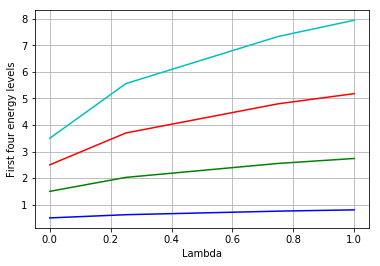

In [591]:
#Number 3

import numpy as np
from scipy.linalg import eigh
from scipy.sparse.linalg import eigsh
from pylab import *
from matplotlib import pyplot as plt

np.set_printoptions(precision = 8, suppress = True)  #Number of digits after decimals

N = 600

#Doing the long process of formatting each one to plot....There's an easier way but screw it...

#1

lam1 = 0

H1 = np.zeros([N + 1, N + 1])

for n in range(N + 1):
    for m in range(N + 1):
        if n == m:
            H1[n, m] = (n + 0.5) + lam1 * (6 * n ** 2 + 6 * n + 3) / 4
        if n == m - 2:
            H1[n, m] = lam1 * (n + (3 / 2)) * np.sqrt((n + 1) * (n + 2))
        if n == m + 2:
            H1[n, m] = lam1 * (n - (1 / 2)) * np.sqrt(n * (n - 1))
        if n == m - 4:    
            H1[n, m] = lam1 * np.sqrt((n + 1) * (n + 2) * (n + 3) * (n + 4)) / 4
        if n == m + 4:    
            H1[n, m] = lam1 * np.sqrt((n - 3) * (n - 2) * (n - 1) * n) / 4

#2

lam2 = 0.25

H2 = np.zeros([N + 1, N + 1])

for n in range(N + 1):
    for m in range(N + 1):
        if n == m:
            H2[n, m] = (n + 0.5) + lam2 * (6 * n ** 2 + 6 * n + 3) / 4
        if n == m - 2:
            H2[n, m] = lam2 * (n + (3 / 2)) * np.sqrt((n + 1) * (n + 2))
        if n == m + 2:
            H2[n, m] = lam2 * (n - (1 / 2)) * np.sqrt(n * (n - 1))
        if n == m - 4:    
            H2[n, m] = lam2 * np.sqrt((n + 1) * (n + 2) * (n + 3) * (n + 4)) / 4
        if n == m + 4:    
            H2[n, m] = lam2 * np.sqrt((n - 3) * (n - 2) * (n - 1) * n) / 4
            
#3

lam3 = 0.75

H3 = np.zeros([N + 1, N + 1])

for n in range(N + 1):
    for m in range(N + 1):
        if n == m:
            H3[n, m] = (n + 0.5) + lam3 * (6 * n ** 2 + 6 * n + 3) / 4
        if n == m - 2:
            H3[n, m] = lam3 * (n + (3 / 2)) * np.sqrt((n + 1) * (n + 2))
        if n == m + 2:
            H3[n, m] = lam3 * (n - (1 / 2)) * np.sqrt(n * (n - 1))
        if n == m - 4:    
            H3[n, m] = lam3 * np.sqrt((n + 1) * (n + 2) * (n + 3) * (n + 4)) / 4
        if n == m + 4:    
            H3[n, m] = lam3 * np.sqrt((n - 3) * (n - 2) * (n - 1) * n) / 4

#4

lam4 = 1

H4 = np.zeros([N + 1, N + 1])

for n in range(N + 1):
    for m in range(N + 1):
        if n == m:
            H4[n, m] = (n + 0.5) + lam4 * (6 * n ** 2 + 6 * n + 3) / 4
        if n == m - 2:
            H4[n, m] = lam4 * (n + (3 / 2)) * np.sqrt((n + 1) * (n + 2))
        if n == m + 2:
            H4[n, m] = lam4 * (n - (1 / 2)) * np.sqrt(n * (n - 1))
        if n == m - 4:    
            H4[n, m] = lam4 * np.sqrt((n + 1) * (n + 2) * (n + 3) * (n + 4)) / 4
        if n == m + 4:    
            H4[n, m] = lam4 * np.sqrt((n - 3) * (n - 2) * (n - 1) * n) / 4

#Now doing each of these for the eigenvalues and eigenvectors....Good lord...

#1
evals_small1, evecs_small1 = eigsh(H1, 4, which='SM', tol=1E-5)

#2
evals_small2, evecs_small2 = eigsh(H2, 4, which='SM', tol=1E-5)

#3
evals_small3, evecs_small3 = eigsh(H3, 4, which='SM', tol=1E-5)

#4
evals_small4, evecs_small4 = eigsh(H4, 4, which='SM', tol=1E-5)

#Now for the x's....This is not efficient

x = [lam1, lam2, lam3, lam4]

#Now for the y's, but this one is tricky. I'm going to call out specific energy eigenvalues that change from
#lam1 all the way up to lam4....You'll see what I mean:

#For increasing E_0
y1 = [evals_small1[0], evals_small2[0], evals_small3[0], evals_small4[0]]

#For increasing E_1
y2 = [evals_small1[1], evals_small2[1], evals_small3[1], evals_small4[1]]

#For increasing E_2
y3 = [evals_small1[2], evals_small2[2], evals_small3[2], evals_small4[2]]

#For increasing E_3
y4 = [evals_small1[3], evals_small2[3], evals_small3[3], evals_small4[3]]

#Time to plot!

plt.plot(x, y1, 'b-', label='E_0')
plt.plot(x, y2, 'g-', label='E_1')
plt.plot(x, y3, 'r-', label='E_2')
plt.plot(x, y4, 'c-', label='E_3')

grid(True)
xlabel('Lambda')
ylabel('First four energy levels')

show()

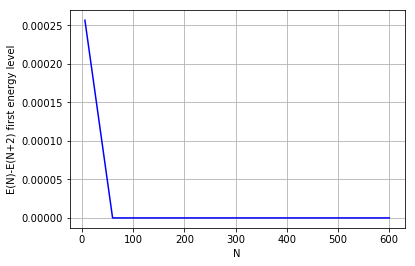

In [592]:
#Number 4

import numpy as np
from scipy.linalg import eigh
from scipy.sparse.linalg import eigsh
from pylab import *
from matplotlib import pyplot as plt

np.set_printoptions(precision = 8, suppress = True)

lam = 1

#For E(N), one of the lowest energy levels would E_0. So, I need to find eigenvalues of this for N = 0 to
#N = 600 for ten consecutive points

N0 = 6

H0 = np.zeros([N0 + 1, N0 + 1])  

for n in range(N0 + 1):
    for m in range(N0 + 1):
        if n == m: 
            H0[n, m] = (n + 0.5) + lam * (6 * n ** 2 + 6 * n + 3) / 4  
        if n == m - 2:
            H0[n, m] = lam * (n + (3 / 2)) * np.sqrt((n + 1) * (n + 2))  
        if n == m + 2:                                                  
            H0[n, m] = lam * (n - (1 / 2)) * np.sqrt(n * (n - 1))
        if n == m - 4:    
            H0[n, m] = lam * np.sqrt((n + 1) * (n + 2) * (n + 3) * (n + 4)) / 4
        if n == m + 4:    
            H0[n, m] = lam * np.sqrt((n - 3) * (n - 2) * (n - 1) * n) / 4
            
evals_small0, evecs_small0 = eigsh(H0, 4, which='SM', tol=1E-5)
#
N1 = 60

H1 = np.zeros([N1 + 1, N1 + 1]) 

for n in range(N1 + 1):
    for m in range(N1 + 1):
        if n == m: 
            H1[n, m] = (n + 0.5) + lam * (6 * n ** 2 + 6 * n + 3) / 4  
        if n == m - 2:
            H1[n, m] = lam * (n + (3 / 2)) * np.sqrt((n + 1) * (n + 2)) 
        if n == m + 2:                                              
            H1[n, m] = lam * (n - (1 / 2)) * np.sqrt(n * (n - 1))
        if n == m - 4:    
            H1[n, m] = lam * np.sqrt((n + 1) * (n + 2) * (n + 3) * (n + 4)) / 4
        if n == m + 4:    
            H1[n, m] = lam * np.sqrt((n - 3) * (n - 2) * (n - 1) * n) / 4
            
evals_small1, evecs_small1 = eigsh(H1, 4, which='SM', tol=1E-5)
#
N2 = 120

H2 = np.zeros([N2 + 1, N2 + 1])  

for n in range(N2 + 1):
    for m in range(N2 + 1):
        if n == m: 
            H2[n, m] = (n + 0.5) + lam * (6 * n ** 2 + 6 * n + 3) / 4 
        if n == m - 2:
            H2[n, m] = lam * (n + (3 / 2)) * np.sqrt((n + 1) * (n + 2)) 
        if n == m + 2:                                                  
            H2[n, m] = lam * (n - (1 / 2)) * np.sqrt(n * (n - 1))
        if n == m - 4:    
            H2[n, m] = lam * np.sqrt((n + 1) * (n + 2) * (n + 3) * (n + 4)) / 4
        if n == m + 4:    
            H2[n, m] = lam * np.sqrt((n - 3) * (n - 2) * (n - 1) * n) / 4
            
evals_small2, evecs_small2 = eigsh(H2, 4, which='SM', tol=1E-5)
#
N3 = 180

H3 = np.zeros([N3 + 1, N3 + 1])  

for n in range(N3 + 1):
    for m in range(N3 + 1):
        if n == m: 
            H3[n, m] = (n + 0.5) + lam * (6 * n ** 2 + 6 * n + 3) / 4 
        if n == m - 2:
            H3[n, m] = lam * (n + (3 / 2)) * np.sqrt((n + 1) * (n + 2)) 
        if n == m + 2:                                                  
            H3[n, m] = lam * (n - (1 / 2)) * np.sqrt(n * (n - 1))
        if n == m - 4:    
            H3[n, m] = lam * np.sqrt((n + 1) * (n + 2) * (n + 3) * (n + 4)) / 4
        if n == m + 4:    
            H3[n, m] = lam * np.sqrt((n - 3) * (n - 2) * (n - 1) * n) / 4
            
evals_small3, evecs_small3 = eigsh(H3, 4, which='SM', tol=1E-5)
#
N4 = 240

H4 = np.zeros([N4 + 1, N4 + 1])  

for n in range(N4 + 1):
    for m in range(N4 + 1):
        if n == m: 
            H4[n, m] = (n + 0.5) + lam * (6 * n ** 2 + 6 * n + 3) / 4 
        if n == m - 2:
            H4[n, m] = lam * (n + (3 / 2)) * np.sqrt((n + 1) * (n + 2)) 
        if n == m + 2:                                                  
            H4[n, m] = lam * (n - (1 / 2)) * np.sqrt(n * (n - 1))
        if n == m - 4:    
            H4[n, m] = lam * np.sqrt((n + 1) * (n + 2) * (n + 3) * (n + 4)) / 4
        if n == m + 4:    
            H4[n, m] = lam * np.sqrt((n - 3) * (n - 2) * (n - 1) * n) / 4
            
evals_small4, evecs_small4 = eigsh(H4, 4, which='SM', tol=1E-5)
#
N5 = 300

H5 = np.zeros([N5 + 1, N5 + 1])  

for n in range(N5 + 1):
    for m in range(N5 + 1):
        if n == m: 
            H5[n, m] = (n + 0.5) + lam * (6 * n ** 2 + 6 * n + 3) / 4 
        if n == m - 2:
            H5[n, m] = lam * (n + (3 / 2)) * np.sqrt((n + 1) * (n + 2)) 
        if n == m + 2:                                                  
            H5[n, m] = lam * (n - (1 / 2)) * np.sqrt(n * (n - 1))
        if n == m - 4:    
            H5[n, m] = lam * np.sqrt((n + 1) * (n + 2) * (n + 3) * (n + 4)) / 4
        if n == m + 4:    
            H5[n, m] = lam * np.sqrt((n - 3) * (n - 2) * (n - 1) * n) / 4
            
evals_small5, evecs_small5 = eigsh(H5, 4, which='SM', tol=1E-5)
#
N6 = 360

H6 = np.zeros([N6 + 1, N6 + 1]) 

for n in range(N6 + 1):
    for m in range(N6 + 1):
        if n == m: 
            H6[n, m] = (n + 0.5) + lam * (6 * n ** 2 + 6 * n + 3) / 4 
        if n == m - 2:
            H6[n, m] = lam * (n + (3 / 2)) * np.sqrt((n + 1) * (n + 2)) 
        if n == m + 2:                                                  
            H6[n, m] = lam * (n - (1 / 2)) * np.sqrt(n * (n - 1))
        if n == m - 4:    
            H6[n, m] = lam * np.sqrt((n + 1) * (n + 2) * (n + 3) * (n + 4)) / 4
        if n == m + 4:    
            H6[n, m] = lam * np.sqrt((n - 3) * (n - 2) * (n - 1) * n) / 4
            
evals_small6, evecs_small6 = eigsh(H6, 4, which='SM', tol=1E-5)
#
N7 = 420

H7 = np.zeros([N7 + 1, N7 + 1])  

for n in range(N7 + 1):
    for m in range(N7 + 1):
        if n == m: 
            H7[n, m] = (n + 0.5) + lam * (6 * n ** 2 + 6 * n + 3) / 4 
        if n == m - 2:
            H7[n, m] = lam * (n + (3 / 2)) * np.sqrt((n + 1) * (n + 2)) 
        if n == m + 2:                                                  
            H7[n, m] = lam * (n - (1 / 2)) * np.sqrt(n * (n - 1))
        if n == m - 4:    
            H7[n, m] = lam * np.sqrt((n + 1) * (n + 2) * (n + 3) * (n + 4)) / 4
        if n == m + 4:    
            H7[n, m] = lam * np.sqrt((n - 3) * (n - 2) * (n - 1) * n) / 4
            
evals_small7, evecs_small7 = eigsh(H7, 4, which='SM', tol=1E-5)
#
N8 = 480

H8 = np.zeros([N8 + 1, N8 + 1]) 

for n in range(N8 + 1):
    for m in range(N8 + 1):
        if n == m: 
            H8[n, m] = (n + 0.5) + lam * (6 * n ** 2 + 6 * n + 3) / 4 
        if n == m - 2:
            H8[n, m] = lam * (n + (3 / 2)) * np.sqrt((n + 1) * (n + 2)) 
        if n == m + 2:                                                  
            H8[n, m] = lam * (n - (1 / 2)) * np.sqrt(n * (n - 1))
        if n == m - 4:    
            H8[n, m] = lam * np.sqrt((n + 1) * (n + 2) * (n + 3) * (n + 4)) / 4
        if n == m + 4:    
            H8[n, m] = lam * np.sqrt((n - 3) * (n - 2) * (n - 1) * n) / 4
            
evals_small8, evecs_small8 = eigsh(H8, 4, which='SM', tol=1E-5)
#
N9 = 540

H9 = np.zeros([N9 + 1, N9 + 1])

for n in range(N9 + 1):
    for m in range(N9 + 1):
        if n == m: 
            H9[n, m] = (n + 0.5) + lam * (6 * n ** 2 + 6 * n + 3) / 4 
        if n == m - 2:
            H9[n, m] = lam * (n + (3 / 2)) * np.sqrt((n + 1) * (n + 2)) 
        if n == m + 2:                                                  
            H9[n, m] = lam * (n - (1 / 2)) * np.sqrt(n * (n - 1))
        if n == m - 4:    
            H9[n, m] = lam * np.sqrt((n + 1) * (n + 2) * (n + 3) * (n + 4)) / 4
        if n == m + 4:    
            H9[n, m] = lam * np.sqrt((n - 3) * (n - 2) * (n - 1) * n) / 4
            
evals_small9, evecs_small9 = eigsh(H9, 4, which='SM', tol=1E-5)
#
N10 = 600

H10 = np.zeros([N10 + 1, N10 + 1]) 

for n in range(N10 + 1):
    for m in range(N10 + 1):
        if n == m: 
            H10[n, m] = (n + 0.5) + lam * (6 * n ** 2 + 6 * n + 3) / 4 
        if n == m - 2:
            H10[n, m] = lam * (n + (3 / 2)) * np.sqrt((n + 1) * (n + 2)) 
        if n == m + 2:                                                  
            H10[n, m] = lam * (n - (1 / 2)) * np.sqrt(n * (n - 1))
        if n == m - 4:    
            H10[n, m] = lam * np.sqrt((n + 1) * (n + 2) * (n + 3) * (n + 4)) / 4
        if n == m + 4:    
            H10[n, m] = lam * np.sqrt((n - 3) * (n - 2) * (n - 1) * n) / 4
            
evals_small10, evecs_small10 = eigsh(H10, 4, which='SM', tol=1E-5)

#Now E(N+2)

#
N00 = N0 + 2

H00 = np.zeros([N00 + 1, N00 + 1])  

for n in range(N00 + 1):
    for m in range(N00 + 1):
        if n == m: 
            H00[n, m] = (n + 0.5) + lam * (6 * n ** 2 + 6 * n + 3) / 4 
        if n == m - 2:
            H00[n, m] = lam * (n + (3 / 2)) * np.sqrt((n + 1) * (n + 2)) 
        if n == m + 2:                                                  
            H00[n, m] = lam * (n - (1 / 2)) * np.sqrt(n * (n - 1))
        if n == m - 4:    
            H00[n, m] = lam * np.sqrt((n + 1) * (n + 2) * (n + 3) * (n + 4)) / 4
        if n == m + 4:    
            H00[n, m] = lam * np.sqrt((n - 3) * (n - 2) * (n - 1) * n) / 4
            
evals_small00, evecs_small00 = eigsh(H00, 4, which='SM', tol=1E-5)
#
N01 = N1 + 2

H01 = np.zeros([N01 + 1, N01 + 1])  

for n in range(N01 + 1):
    for m in range(N01 + 1):
        if n == m: 
            H01[n, m] = (n + 0.5) + lam * (6 * n ** 2 + 6 * n + 3) / 4 
        if n == m - 2:
            H01[n, m] = lam * (n + (3 / 2)) * np.sqrt((n + 1) * (n + 2)) 
        if n == m + 2:                                                  
            H01[n, m] = lam * (n - (1 / 2)) * np.sqrt(n * (n - 1))
        if n == m - 4:    
            H01[n, m] = lam * np.sqrt((n + 1) * (n + 2) * (n + 3) * (n + 4)) / 4
        if n == m + 4:    
            H01[n, m] = lam * np.sqrt((n - 3) * (n - 2) * (n - 1) * n) / 4
            
evals_small01, evecs_small01 = eigsh(H01, 4, which='SM', tol=1E-5)
#
N02 = N2 + 2

H02 = np.zeros([N02 + 1, N02 + 1])  

for n in range(N02 + 1):
    for m in range(N02 + 1):
        if n == m: 
            H02[n, m] = (n + 0.5) + lam * (6 * n ** 2 + 6 * n + 3) / 4 
        if n == m - 2:
            H02[n, m] = lam * (n + (3 / 2)) * np.sqrt((n + 1) * (n + 2)) 
        if n == m + 2:                                                  
            H02[n, m] = lam * (n - (1 / 2)) * np.sqrt(n * (n - 1))
        if n == m - 4:    
            H02[n, m] = lam * np.sqrt((n + 1) * (n + 2) * (n + 3) * (n + 4)) / 4
        if n == m + 4:    
            H02[n, m] = lam * np.sqrt((n - 3) * (n - 2) * (n - 1) * n) / 4
            
evals_small02, evecs_small02 = eigsh(H02, 4, which='SM', tol=1E-5)
#
N03 = N3 + 2

H03 = np.zeros([N03 + 1, N03 + 1])  

for n in range(N03 + 1):
    for m in range(N03 + 1):
        if n == m: 
            H03[n, m] = (n + 0.5) + lam * (6 * n ** 2 + 6 * n + 3) / 4 
        if n == m - 2:
            H03[n, m] = lam * (n + (3 / 2)) * np.sqrt((n + 1) * (n + 2)) 
        if n == m + 2:                                                  
            H03[n, m] = lam * (n - (1 / 2)) * np.sqrt(n * (n - 1))
        if n == m - 4:    
            H03[n, m] = lam * np.sqrt((n + 1) * (n + 2) * (n + 3) * (n + 4)) / 4
        if n == m + 4:    
            H03[n, m] = lam * np.sqrt((n - 3) * (n - 2) * (n - 1) * n) / 4
            
evals_small03, evecs_small03 = eigsh(H03, 4, which='SM', tol=1E-5)
#
N04 = N4 + 2

H04 = np.zeros([N04 + 1, N04 + 1])  

for n in range(N04 + 1):
    for m in range(N04 + 1):
        if n == m: 
            H04[n, m] = (n + 0.5) + lam * (6 * n ** 2 + 6 * n + 3) / 4 
        if n == m - 2:
            H04[n, m] = lam * (n + (3 / 2)) * np.sqrt((n + 1) * (n + 2)) 
        if n == m + 2:                                                  
            H04[n, m] = lam * (n - (1 / 2)) * np.sqrt(n * (n - 1))
        if n == m - 4:    
            H04[n, m] = lam * np.sqrt((n + 1) * (n + 2) * (n + 3) * (n + 4)) / 4
        if n == m + 4:    
            H04[n, m] = lam * np.sqrt((n - 3) * (n - 2) * (n - 1) * n) / 4
            
evals_small04, evecs_small04 = eigsh(H04, 4, which='SM', tol=1E-5)
#
N05 = N5 + 2

H05 = np.zeros([N05 + 1, N05 + 1])  

for n in range(N05 + 1):
    for m in range(N05 + 1):
        if n == m: 
            H05[n, m] = (n + 0.5) + lam * (6 * n ** 2 + 6 * n + 3) / 4 
        if n == m - 2:
            H05[n, m] = lam * (n + (3 / 2)) * np.sqrt((n + 1) * (n + 2)) 
        if n == m + 2:                                                  
            H05[n, m] = lam * (n - (1 / 2)) * np.sqrt(n * (n - 1))
        if n == m - 4:    
            H05[n, m] = lam * np.sqrt((n + 1) * (n + 2) * (n + 3) * (n + 4)) / 4
        if n == m + 4:    
            H05[n, m] = lam * np.sqrt((n - 3) * (n - 2) * (n - 1) * n) / 4
            
evals_small05, evecs_small05 = eigsh(H05, 4, which='SM', tol=1E-5)
#
N06 = N6 + 2

H06 = np.zeros([N06 + 1, N06 + 1])  

for n in range(N06 + 1):
    for m in range(N06 + 1):
        if n == m: 
            H06[n, m] = (n + 0.5) + lam * (6 * n ** 2 + 6 * n + 3) / 4 
        if n == m - 2:
            H06[n, m] = lam * (n + (3 / 2)) * np.sqrt((n + 1) * (n + 2)) 
        if n == m + 2:                                                  
            H06[n, m] = lam * (n - (1 / 2)) * np.sqrt(n * (n - 1))
        if n == m - 4:    
            H06[n, m] = lam * np.sqrt((n + 1) * (n + 2) * (n + 3) * (n + 4)) / 4
        if n == m + 4:    
            H06[n, m] = lam * np.sqrt((n - 3) * (n - 2) * (n - 1) * n) / 4
            
evals_small06, evecs_small06 = eigsh(H06, 4, which='SM', tol=1E-5)
#
N07 = N7 + 2

H07 = np.zeros([N07 + 1, N07 + 1])  

for n in range(N07 + 1):
    for m in range(N07 + 1):
        if n == m: 
            H07[n, m] = (n + 0.5) + lam * (6 * n ** 2 + 6 * n + 3) / 4 
        if n == m - 2:
            H07[n, m] = lam * (n + (3 / 2)) * np.sqrt((n + 1) * (n + 2)) 
        if n == m + 2:                                                  
            H07[n, m] = lam * (n - (1 / 2)) * np.sqrt(n * (n - 1))
        if n == m - 4:    
            H07[n, m] = lam * np.sqrt((n + 1) * (n + 2) * (n + 3) * (n + 4)) / 4
        if n == m + 4:    
            H07[n, m] = lam * np.sqrt((n - 3) * (n - 2) * (n - 1) * n) / 4
            
evals_small07, evecs_small07 = eigsh(H07, 4, which='SM', tol=1E-5)
#
N08 = N8 + 2

H08 = np.zeros([N08 + 1, N08 + 1])  

for n in range(N08 + 1):
    for m in range(N08 + 1):
        if n == m: 
            H08[n, m] = (n + 0.5) + lam * (6 * n ** 2 + 6 * n + 3) / 4 
        if n == m - 2:
            H08[n, m] = lam * (n + (3 / 2)) * np.sqrt((n + 1) * (n + 2)) 
        if n == m + 2:                                                  
            H08[n, m] = lam * (n - (1 / 2)) * np.sqrt(n * (n - 1))
        if n == m - 4:    
            H08[n, m] = lam * np.sqrt((n + 1) * (n + 2) * (n + 3) * (n + 4)) / 4
        if n == m + 4:    
            H08[n, m] = lam * np.sqrt((n - 3) * (n - 2) * (n - 1) * n) / 4
            
evals_small08, evecs_small08 = eigsh(H08, 4, which='SM', tol=1E-5)
#
N09 = N9 + 2

H09 = np.zeros([N09 + 1, N09 + 1])  

for n in range(N09 + 1):
    for m in range(N09 + 1):
        if n == m: 
            H09[n, m] = (n + 0.5) + lam * (6 * n ** 2 + 6 * n + 3) / 4 
        if n == m - 2:
            H09[n, m] = lam * (n + (3 / 2)) * np.sqrt((n + 1) * (n + 2)) 
        if n == m + 2:                                                  
            H09[n, m] = lam * (n - (1 / 2)) * np.sqrt(n * (n - 1))
        if n == m - 4:    
            H09[n, m] = lam * np.sqrt((n + 1) * (n + 2) * (n + 3) * (n + 4)) / 4
        if n == m + 4:    
            H09[n, m] = lam * np.sqrt((n - 3) * (n - 2) * (n - 1) * n) / 4
            
evals_small09, evecs_small09 = eigsh(H09, 4, which='SM', tol=1E-5)
#
N010 = N10 + 2

H010 = np.zeros([N010 + 1, N010 + 1])  

for n in range(N010 + 1):
    for m in range(N010 + 1):
        if n == m: 
            H010[n, m] = (n + 0.5) + lam * (6 * n ** 2 + 6 * n + 3) / 4 
        if n == m - 2:
            H010[n, m] = lam * (n + (3 / 2)) * np.sqrt((n + 1) * (n + 2)) 
        if n == m + 2:                                                  
            H010[n, m] = lam * (n - (1 / 2)) * np.sqrt(n * (n - 1))
        if n == m - 4:    
            H010[n, m] = lam * np.sqrt((n + 1) * (n + 2) * (n + 3) * (n + 4)) / 4
        if n == m + 4:    
            H010[n, m] = lam * np.sqrt((n - 3) * (n - 2) * (n - 1) * n) / 4
            
evals_small010, evecs_small010 = eigsh(H010, 4, which='SM', tol=1E-5)

#Now, I plot only increasing N values:

x = [N0, N1, N2, N3, N4, N5, N6, N7, N8, N9, N10]

#Now, I subtract the two different eigenvalues for N and N=2, and put it in an y-array:

y0 = evals_small0[0] - evals_small00[0]
y1 = evals_small1[0] - evals_small01[0]
y2 = evals_small2[0] - evals_small02[0]
y3 = evals_small3[0] - evals_small03[0]
y4 = evals_small4[0] - evals_small04[0]
y5 = evals_small5[0] - evals_small05[0]
y6 = evals_small6[0] - evals_small06[0]
y7 = evals_small7[0] - evals_small07[0]
y8 = evals_small8[0] - evals_small08[0]
y9 = evals_small9[0] - evals_small09[0]
y10 = evals_small10[0] - evals_small010[0]

y = [y0, y1, y2, y3, y4, y5, y6, y7, y8, y9, y10]

#And plot!

plt.plot(x, y, 'b-')
grid(True)
xlabel('N')
ylabel('E(N)-E(N+2) first energy level')

show()